# Session 1: Principal Component Analysis

The goal is to apply PCA to a couple of datasets and to understand the results. 
The code is written in Python, and it is run on Google Colab.

## Google Colab

Colab is a service that hosts Jupyter notebooks, which provides the computing resources (also GPUs). You don't need to install anything locally, because Colab provides a remote machine that will run your python code. 
Jupyter notebooks are files which support both text and code. The code runs in multiple cells, which is very convenient because it let us compartmentalize the script.

## Python

Python is a (very) high-level programming language, which is interpreted at run-time instead of being compiled. This means that we can run the code without needing to compile it first. 
Python is very popular in machine learning because it offers a huge number of libraries that we can use to build machine-learning and deep learning models. Also, it is a dynamically typed language, meaning that we do not need to define the type of variable before assignment.

### A brief intro to Python

In [12]:
# create some variables
a = 3.2 # this is a float
b = 'test' # this is a string
c = [1, 2, 3] # this is a list

print(type(a)) # check the type

<class 'float'>


In [13]:
# do some math
a = 3.2
b = 7.4

c = a * b # multiplication
d = a / b # division
e = a ** b # exponentiation

## Numpy

Everything that we do in machine learning is linear algebra (matrix multiplication). Numpy is a python library specialised for operations on arrays (vectors, matrices and N-dimensional tensors). Numpy is widely used, and it is pre-installed on Colab.

* The default shape of an array of length n is given by *(n,)*. You can apply the *.reshape* method to reorganise the array into a given (n_row, n_col) configuration.
* You can use *-1* to infer the shape dimension from the length of the array
* *.reshape(-1)* is equivalent to *.ravel()* or *.flatten()* and allows to flatten an array

> Note: It is strongly recommended to keep in mind the dimensions of the arrays (vectors or matrices) used to avoid errors (which are sometimes not visible!)

In [14]:
# import the library
import numpy as np

# Create a 1D array (vector)
array = np.array([1, 2, 3]) # Neither a row neither a column, only a 1D array with a given length
array_row = array.reshape(1, -1) # (row, col)
array_col = array.reshape(-1, 1)

print(f'array shape: {array.shape}')
print(f'array_row shape: {array_row.shape}')
print(f'array_col shape: {array_col.shape}')

# Create a 2D array (matrix)
matrix = np.array([[1, 2, 3],
                  [4, 5, 6]])

print(f'matrix shape: {matrix.shape}')

# Transpose of a matrix
matrix_transposed = matrix.T # <!> Not the same as matrix.reshape(3, 2) <!>
print(matrix_transposed)

# Flatten the matrix 
matrix_flattened = matrix.reshape(-1,) # Or matrix.ravel()
print(matrix_flattened)

# NB: len(matrix) will gives the number of items in the matrix, which is then considered as a list -> returns the number of rows of this list


array shape: (3,)
array_row shape: (1, 3)
array_col shape: (3, 1)
matrix shape: (2, 3)
[[1 4]
 [2 5]
 [3 6]]
[1 2 3 4 5 6]


In [15]:
# perform some multiplications
A = np.array([[1, 2, 3],
            [4, 5, 6]]) # (2, 3)

B = np.array([[13, 12],
             [12, 13],
             [13, 12]]) # (3, 2)

# matrix multiplication
C = A @ B # Or A.dot(B) -> Both will return a numpy.ndarray

print(C)

[[ 76  74]
 [190 185]]


In [16]:
# access the value of the arrays or store values [row, col]
k1 = array[0]
print(k1)

array[2] = 0
print(array)

k2 = B[2, 1]
print(k2)

k3 = A[:, 0]
print(k3)

1
[1 2 0]
12
[1 4]


## Cycles and functions

The command `for` is used to create a cycle, while the command `def` is used to define a function.

In [17]:
# For cycle
for i in range(10):
    print(i, end=' ') # the end attribute defines the last parameter printed (default = '\n')

0 1 2 3 4 5 6 7 8 9 

In [18]:
# Define functions
def multip(a, b):
    temp = a*b
    return temp

a = 10
b = 3

print(multip(a, b))

30


## Matplotlib

Another useful python library is Matplotlib, which is used to visualize the data. Like Numpy, Matplotlib is widely used and it is generally pre-installed.

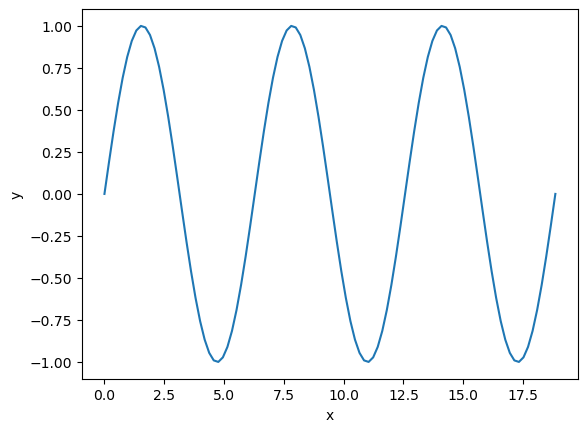

In [19]:
import matplotlib.pyplot as plt

x = np.linspace(0, 6 * np.pi, 100) # this is used to create an array from 0 to 6pi containing 100 points regularly spaced
y = np.sin(x) # compute the sine of x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linspace or Arange ?

&rarr; Use *np.linspace* when you want to control the length of the array! The step will follow ...

&rarr; Use *np.arange* when you want to impose the step size! The length will follow ...

In [20]:
# Example
x_linspace = np.linspace(0, 10, 20) # Length
x_arange = np.arange(0, 10, 10/20) # Step

print(x_linspace)
print(x_arange, end='\n\n')
# Both arrays have the same length 20!
print(x_linspace.shape)
print(x_arange.shape)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]

(20,)
(20,)


## Exercise 1: toy dataset

We want to test PCA on a toy dataset. The dataset contains 2 variables $x$ and $y$. The second variable is a linear function of the first one, but it is corrupted with Gaussian noise. PCA should be able to identify the direction of maximum variance (the first PC) and relegate the noise in the last PC.

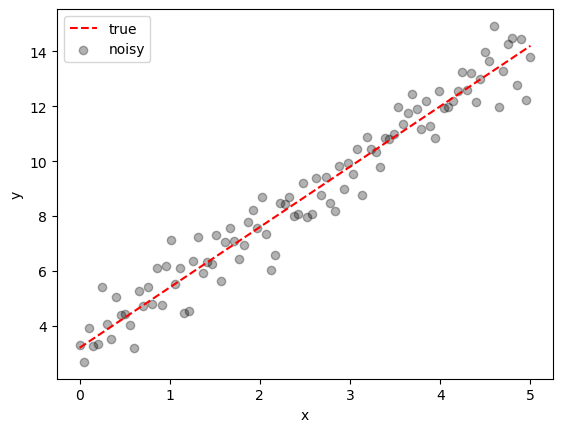

In [21]:
# create the x and y variables
n_points = 100
n_variables = 2

x = np.linspace(0, 5, n_points)
y_true = 3.2 + 2.2*x

rng = np.random.default_rng(121421321) # Build a generator with a given (initial) seed that will provides a stream of (pseudo-)random values, following a given distribution (here: gaussian)
# Assume a random white noise that follows a gaussian distribution with fixed std (homoscedastic case)
noise = rng.normal(loc=0, scale=0.75, size=n_points) # loc = mean, scale = std
# Question: What happens if the std is no longer constant and depends on x ? Try by modifying the value of the scale attribute (heteroscedastic case)

y_noise = y_true + noise

plt.plot(x, y_true, c='r', ls='--', label='true')
plt.scatter(x, y_noise, c='k', alpha=0.3, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [22]:
# create the dataset
D = np.zeros((n_points, n_variables)) # empty matrix

# this operation is called slicing and it is used to put or extract values from an array
D[:, 0] = x # put x in the first column (0) of the array
D[:, 1] = y_noise

print(D.shape) # Dataset

(100, 2)


## PCA algorithm

To find the PCs, we need to follow these steps:
- Center and scale the dataset:
\begin{equation}
\mathbf{D}_0 = (\mathbf{D} - \mathbf{D}_{\mu})\mathbf{D}^{-1}_{\sigma}
\end{equation}


- Compute the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{D}_0^T\mathbf{D}_0 
\end{equation}

- Compute the eigendecomposition of the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{A} \mathbf{L} \mathbf{A}^T 
\end{equation}

- Sort the eigenvectors in descending order of eigenvalues.

- Transform the scaled dataset:
\begin{equation}
\mathbf{Z} = \mathbf{D}_0 \mathbf{A}
\end{equation}

- The original dataset can be reconstructed as:

\begin{equation}
\mathbf{D} = (\mathbf{Z} \mathbf{A}^T)\mathbf{D}_{\sigma} + \mathbf{D}_{\mu}
\end{equation}

[3.17523785e-16 4.48530102e-16]
[1. 1.]


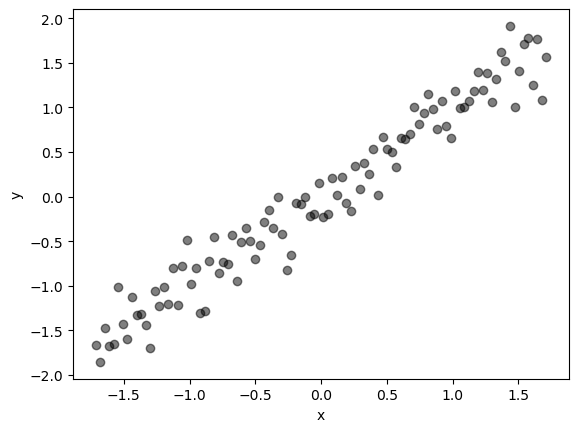

In [24]:
# To do: center and scale the dataset

# Hints:
# - Create two matrices D_m and D_s using np.mean() and np.std()
# - Compute the inverse of D_s using np.linalg.inv() -> Why doesn't it work straight away? How can you make it work (without AI)?
# - Use the command @ to multiply the matrices

D_m = D.mean(axis=0) # axis=None gives the global mean; axis=0 gives the column mean; axis=1 gives the row mean
D_s = D.std(axis=0)

D_s_diag = np.diag(D_s) # From shape (2,) to shape (2, 2) (you simply added 0 to the non-diagonal terms)

D_s_inv = np.linalg.inv(D_s_diag)

D0 = (D - D_m) @ D_s_inv

# Sanity check
print(D0.mean(axis=0)) # You obtain ~ 0: correct
print(D0.std(axis=0)) # Returns 1: correct

plt.scatter(D0[:, 0], D0[:, 1], c='k', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [25]:
# To do: compute the covariance matrix

# Hint: 
# - Use the function np.transpose() or simply the .T method to transpose the matrix

Cov = D0.T @ D0
print(Cov)

[[100.          97.40206298]
 [ 97.40206298 100.        ]]


In [ ]:
# To do: compute the eigendecomposition of the covariance matrix and sort the eigenvalues and eigenvectors in decreasing order

# Hint:
# - Use the function np.linalg.eig() to compute the eigendecomposition
# - Use np.argsort() to sort the eigenvectors

lambda_cov, A_cov = np.linalg.eig(Cov) # Not necessarily ordered !

idx = np.argsort(lambda_cov)[::-1] # Order it in decreasing order

lambda_cov = lambda_cov[idx]
A_cov = A_cov[:, idx]

print(f'Eigenvalues: {lambda_cov}')
print(f'Eigenvectors: {A_cov}')

L = np.diag(lambda_cov)

Eigenvalues: [197.40206298   2.59793702]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
# To do: compute the transformed dataset 
Z = D0 @ A_cov
print(Z.shape) # You haven't cut the dimensions yet!

(100, 2)


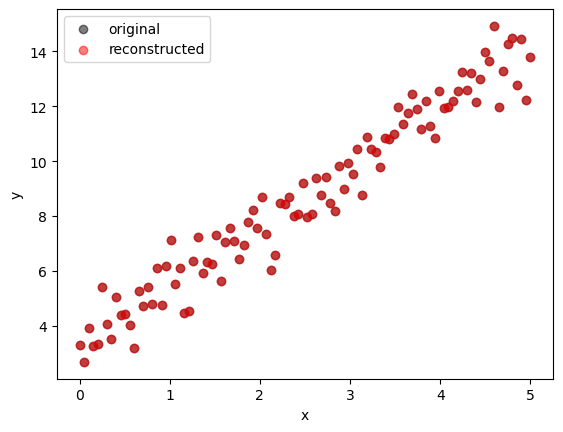

In [ ]:
# To do: reconstruct the dataset and plot it against the original one

D0_reconstructed = Z @ A_cov.T

D_tild = D0_reconstructed @ D_s_diag + D_m

plt.scatter(D[:, 0], D[:, 1], c='k', alpha=0.5, label='original')
plt.scatter(D_tild[:, 0], D_tild[:, 1], c='r', alpha=0.5, label='reconstructed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# You see that the reconstructed data is the same as the original one -> PCA without cutting anything is just a change of basis!

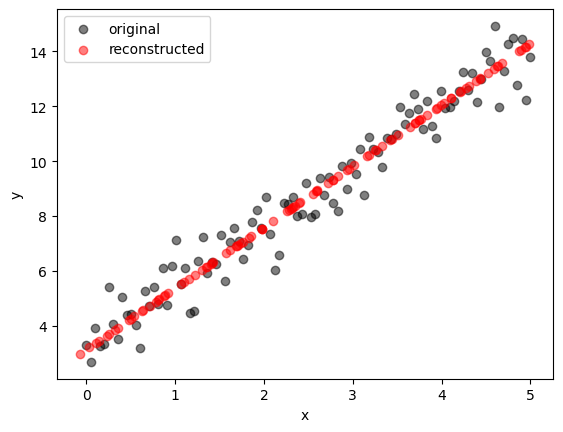

In [31]:
# To do: 
# - compress the dataset by removing the last PC,
# - reconstruct the dataset with the compressed representation

q = 1 # Now we cut!
A_cov_comp = A_cov[:, :q]
Z_comp = D0 @ A_cov_comp
D_tild_comp = (Z_comp @ A_cov_comp.T) @ D_s_diag + D_m

plt.scatter(D[:, 0], D[:, 1], c='k', alpha=0.5, label='original')
plt.scatter(D_tild_comp[:, 0], D_tild_comp[:, 1], c='r', alpha=0.5, label='reconstructed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
# To do: create a python function that takes the data as input and computes the PCA, returning Z, L, A as output

def PCA(D):
    # mean and std of the population
    D_mu = D.mean(axis=0)
    D_sigma = D.std(axis=0)
    
    D_sigma_diag = np.diag(D_sigma)
    D_sigma_inv = np.linalg.inv(D_sigma_diag)

    # Standardisation (scaling + centring)
    D0 = (D - D_mu) @ D_sigma_inv

    # Covariance matrix
    K = D0.T @ D0

    # Eigenvalue decompositon
    l, A = np.linalg.eig(K) 
    idx_sorted = np.argsort(l)[::-1] # Decreasing
    l = l[idx_sorted]
    A = A[:, idx_sorted]

    L = np.diag(l)
    Z = D0 @ A

    return Z, L, A

Z, L, A = PCA(D)

## Singular value decomposition

The PCA can be computed also by applying the SVD to the dataset:
\begin{equation}
\mathbf{D}_0 = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
\end{equation}

in which:
- $\mathbf{A} = \mathbf{V}$,
- $\mathbf{L} = \boldsymbol{\Sigma}^2$,
- $\mathbf{u}_i = \frac{\mathbf{z}_i}{||\mathbf{z}_i||}$

In [ ]:
# To do: check if this is true

# Hint:
# - Use np.linalg.svd(D0, full_matrices=False) to compute the svd

U, svd, Vt = np.linalg.svd(D0, full_matrices=False) # SVD of the scaled dataset: U(100,2), S(2,2), Vt(2, 2)
V = Vt.T

print(np.diag(svd)**2, end='\n\n')
# Both print should be the same!
print(L)

[[197.40206298   0.        ]
 [  0.           2.59793702]]

[[197.40206298   0.        ]
 [  0.           2.59793702]]


## Scikit-learn

Scikit-learn is a python library that contains many machine-learning models, including PCA. It can also handle centering and scaling more naturally. However, we need to install it first because it is not included in Colab.

In [ ]:
! pip install scikit-learn

In [35]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To do: use sklearn to compute PCA

# Hint:
# - Use StandardScaler to center and scale the data
# - Use the scikit-learn documentation to find how to use StandardScaler and PCA functions !

# 1) Call the sklearn object
scaler = StandardScaler()
# 2) Fit the sklearn object (initialisation)
scaler.fit(D)
# 3) Apply the sklearn object
D0 = scaler.transform(D)
print(D0)
# NB: these 1-2-3 steps represent the usual way of using sklearn (high modularity) !

[[-1.71481604 -1.66754697]
 [-1.68017329 -1.85365028]
 [-1.64553055 -1.47199321]
 [-1.6108878  -1.67451724]
 [-1.57624505 -1.65347719]
 [-1.5416023  -1.01255202]
 [-1.50695955 -1.43091157]
 [-1.4723168  -1.60080116]
 [-1.43767406 -1.1293784 ]
 [-1.40303131 -1.33114168]
 [-1.36838856 -1.31930127]
 [-1.33374581 -1.4421728 ]
 [-1.29910306 -1.69384107]
 [-1.26446031 -1.05730871]
 [-1.22981757 -1.22188752]
 [-1.19517482 -1.01395122]
 [-1.16053207 -1.19943137]
 [-1.12588932 -0.79517376]
 [-1.09124657 -1.21255952]
 [-1.05660382 -0.7804444 ]
 [-1.02196108 -0.4833986 ]
 [-0.98731833 -0.98001379]
 [-0.95267558 -0.79514548]
 [-0.91803283 -1.31047481]
 [-0.88339008 -1.28652407]
 [-0.84874733 -0.72081474]
 [-0.81410459 -0.4538635 ]
 [-0.77946184 -0.862176  ]
 [-0.74481909 -0.73859757]
 [-0.71017634 -0.75694979]
 [-0.67553359 -0.42590853]
 [-0.64089084 -0.94185477]
 [-0.6062481  -0.50734068]
 [-0.57160535 -0.35202703]
 [-0.5369626  -0.49946098]
 [-0.50231985 -0.70523506]
 [-0.4676771  -0.5458942 ]
 

## A more complex example

We now want to apply PCA to the "wine dataset". This dataset contains 178 samples with 13 different features. All the wines are categorized in 3 classes.

> Note: The wine dataset can be manipulated in many ways. Try doing the exercice using the pandas library ... It will really make your life easier for the project!

In [37]:
# Import the dataset
from sklearn.datasets import load_wine

wine_data = load_wine().data
n_samples, n_features = wine_data.shape

wine_features = load_wine().feature_names
wine_classes = load_wine().target # Brands of wine bottles tested for instance

print(wine_data.shape)
print(wine_features)
print(wine_classes) 

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


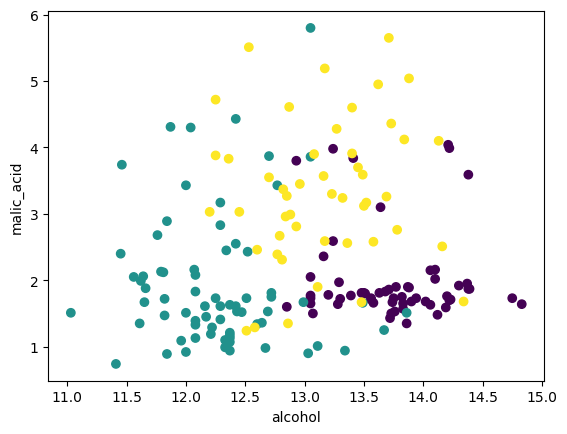

In [42]:
# To do: visualize the dataset

# Hint:
# - Use plt.scatter() to plot the distribution of 'alcohol' and 'malic_acid'
# - Color the scatter using wine_classes

plt.figure()
plt.scatter(x=wine_data[:, 0], y=wine_data[:, 1], c=wine_classes)
plt.xlabel(wine_features[0])
plt.ylabel(wine_features[1])
plt.show()

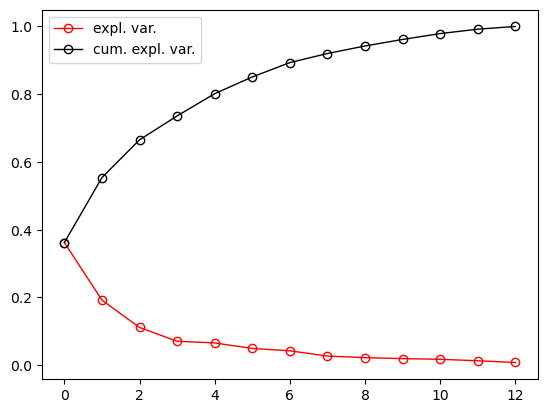

In [73]:
# To do: compute the PCA and show the distribution of the explained variance

# Hint:
# - Use pca.explained_variance_ratio_ to get the explained variance
# - Use np.cumsum() to compute the cumulative variance

from sklearn.decomposition import PCA

# <!> Never forget to scale ! <!>
scaler = StandardScaler()
D0 = scaler.fit_transform(wine_data)

pca = PCA(n_components=n_features) # Build a PCA object

pca.fit(D0) # Apply PCA

A = pca.components_.T # (n_feat, n_comp) -> Always keep the dimensions of the matrix in mind

Z = D0 @ A

ex_var = pca.explained_variance_ratio_
cum_ex_var = np.cumsum(ex_var)

plt.figure()
plt.plot(ex_var, marker='o', markerfacecolor='none', color='r', linewidth=1, label='expl. var.')
plt.plot(cum_ex_var, marker='o', markerfacecolor='none', color='k', linewidth=1, label='cum. expl. var.')
plt.legend()
plt.show()

# Note: The first 6 PCs already explain 90% of the total variance

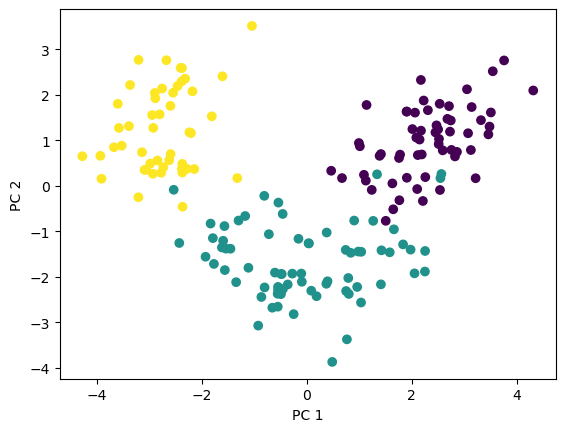

In [74]:
# To do: visualize the first 2 PCs and color them by the wine class

i, j = 0, 1

plt.scatter(Z[:, i], Z[:, j], c=wine_classes)
plt.xlabel(f'PC {i+1}')
plt.ylabel(f'PC {j+1}')
plt.show()

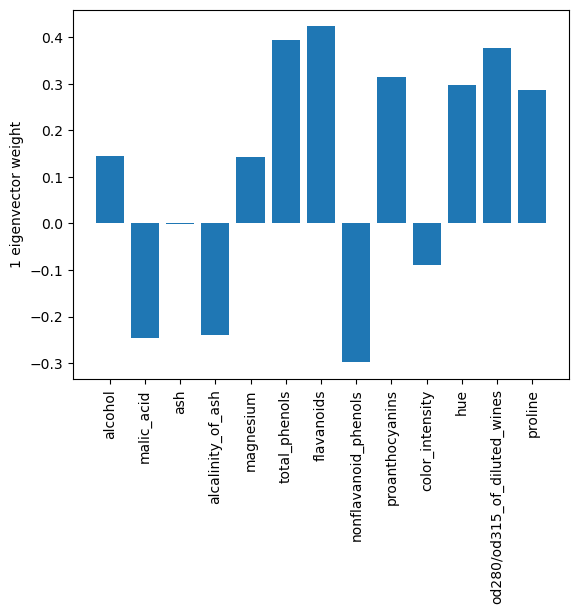

In [75]:
# To do: visualise the scores of the PCs

# Hint:
# - Use plt.bar() to plot a bar plot

# NB: columns of A = eigenvectors / rows of A = coefficients associated with the features for each eigenvector

eigenvector_i = 0 # Take the first one

plt.figure()
plt.bar(np.arange(n_features), A[:, eigenvector_i])
plt.xticks(np.arange(n_features), wine_features, rotation=90)
plt.ylabel(f'{eigenvector_i+1} eigenvector weight')
plt.show()

## Outlier detection

We can use PCA to detect probable outliers in a dataset. We consider a toy dataset containing 2 features ($x$ and $y$) and 100 samples. For the first 95 samples, $x$ is in the range $[0, 10]$ and $y = 4x + 2 + \epsilon$, where $\epsilon$ is Gaussian noise with $\mu = 0 $ and $\sigma = 2.5$. The last 5 points are outliers with $x_{\mathrm{out}}$ is in the range $[2, 3]$ and $y_{\mathrm{out}} = 3 x^2 + x + 10 + \epsilon_{\mathrm{out}}$, where $\epsilon_{\mathrm{out}}$ is Gaussian noise with $\mu_{\mathrm{out}} = 0 $ and $\sigma_{\mathrm{out}} = 5$

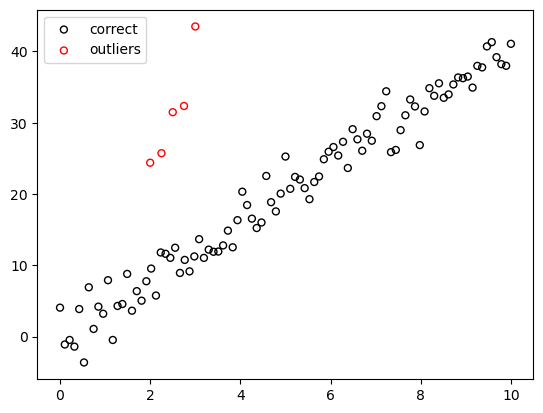

In [76]:
# First we import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# To do: 
# - create 95 correct samples with x in range [0, 10] and y = 4*x + 2 + noise
# - create 5 outliers with x_outl in range [2, 3] and y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl


# Hint:
# - to create a evenly spaced array, you can use the function np.linspace(start, stop, n_points)
# - to create the noise array, you can use the function np.random.normal(mu, sigma, size=n_points)

# this command is used to set a fixed seed for random sampling, 
# so that we have the same result when re-running the code.
np.random.seed(1) 

n_points = 95 # number of points in the dataset
x = np.linspace(0, 10, n_points) # the function linspace creates a vector of 95 values in the range [0,10]

noise = np.random.normal(0, 2.5, size=n_points) # a vector of noise 
y = 4 * x + noise

n_outl = 5
x_outl = np.linspace(2, 3, n_outl)
noise_outl = np.random.normal(0, 5, size=n_outl)
y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl

plt.figure()
plt.scatter(x, y, marker='o', s=25, facecolors='none', edgecolors='k', label='correct')
plt.scatter(x_outl, y_outl, marker='o', s=25, facecolors='none', edgecolors='r', label='outliers')
plt.legend()
plt.show()

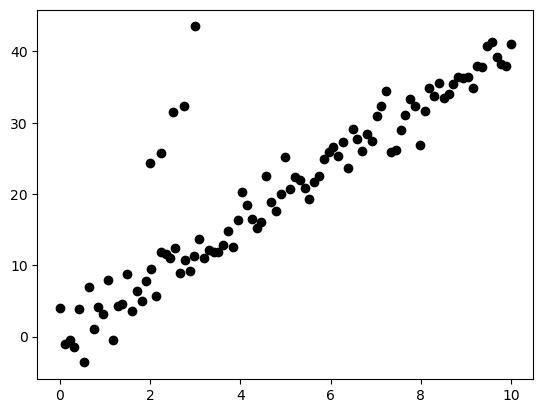

In [77]:
# To do:
# - Create an empty matrix D of size (n_points + n_outl, 2)
# - Put the true values and the outliers in the matrix, using column 0 for x and column 1 for y

# Hint:
# - You can use the function np.empty((n, 2)) to create an empty matrix
# - You can use np.concatenate([a, b]) to concatenate vector a and b

# D = np.empty((n_points + n_outl, 2)) # create an empty matrix of size (n_points + n_outl, 2)

# # the function concatenate is used to concatenate the x and y arrays and store them in the D matrix
# D[:,0] = np.concatenate([x, x_outl]) 
# D[:,1] = np.concatenate([y, y_outl])

# Or you can directly do it like this (do as you prefer):
X = np.hstack([x, x_outl])
Y = np.hstack([y, y_outl])
D = np.vstack([X, Y]).T

# Sanity check (no matter how you do it, always verify your results!)
plt.figure()
plt.scatter(D[:, 0], D[:, 1], c='k') # The outliers are mixed in with the correct values
plt.show()

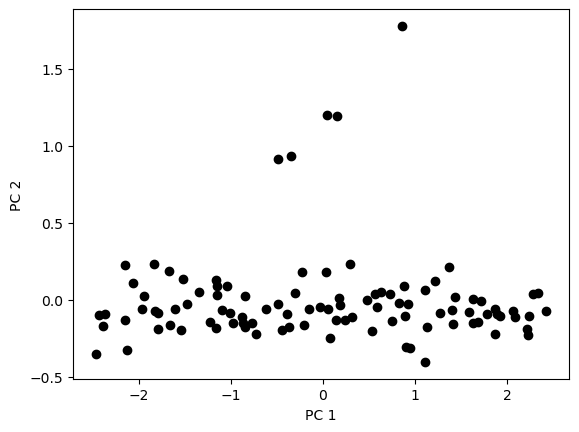

In [ ]:
from sklearn.decomposition import PCA

# To do:
# - Center and scale the matrix D
# - Perform PCA
# - Plot the scores 

# Hints:
# - To center the matrix D, subtract the mean of each column from each column
# - To scale the matrix D, divide each column of the centered matrix by the standard deviation of each column


scaler = StandardScaler()
D0 = scaler.fit_transform(D)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(D0)

A = pca.components_.T
Z = D0 @ A

i, j = 0, 1

plt.figure()
plt.scatter(Z[:, i], Z[:, j], c='k')
plt.xlabel(f'PC {i+1}')
plt.ylabel(f'PC {j+1}')
plt.show()


To find the outliers, we build a classifier using the 2nd PC. To do that, we compute the empirical cumulative distribution function (ecdf) of PC scores squared divided by the corresponding eigenvalue (Mahalanobis distance):

\begin{equation}
d_{M, i} = \frac{z^2_{i,2}}{l_2}
\end{equation}

\begin{equation}
\mathrm{edfc}(t) = \sum_{j = 1}^k d_{M, j} < t
\end{equation}

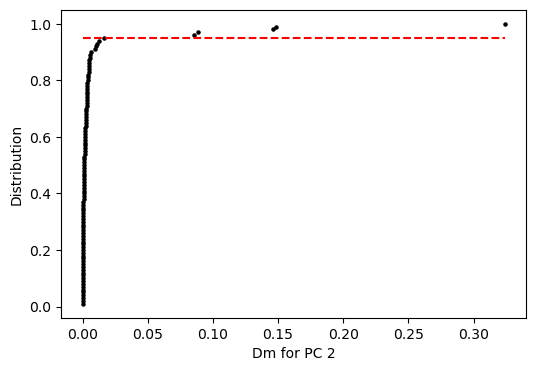

In [118]:
# To do:
# - Calculate the Mahalanobis distance using PC2 
# - Compute the cumulative distribution
# - Set a threshold

def edfc(pc):
    # Sort the Mahalanobis distance
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    # Compute the cumulative distribution
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# We calculate the Mahalanobis distance
eigenvalues = pca.singular_values_**2 # std = sqrt(eigenv)
dist_M = Z[:,1]**2/eigenvalues[1] # distance using PC2 only
# dist_M = np.sum(Z**2/eigenvalues, axis=1) # distance using all PCs

i_sort, pc2_sort, dist_sort = edfc(dist_M)
threshold = 0.95

# We plot the cumulative distribution
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(pc2_sort, dist_sort, c='k', s=5)
ax.set_xlabel('Dm for PC 2')
ax.set_ylabel('Distribution')
ax.hlines(threshold, pc2_sort.min(), pc2_sort.max(), color='r', linestyles='--')
plt.show()
# Note: You should clearly see the outliers

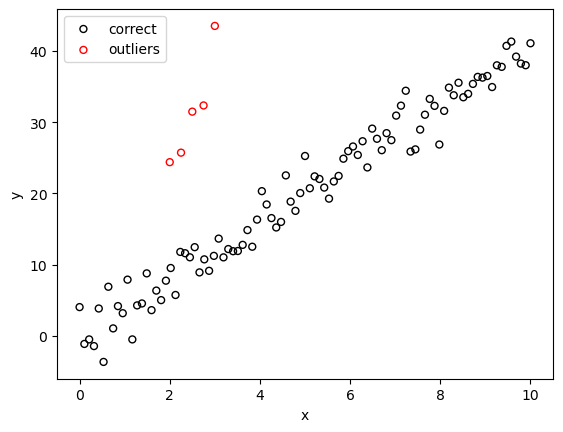

In [119]:
# To do:
# - Apply the threshold to find the outliers

threshold = 0.95 # Play with that

mask = dist_sort > threshold  # This mask operation creates a boolean array that follows the conditions we impose

plt.figure()

plt.scatter(D[i_sort[~mask], 0], D[i_sort[~mask], 1], marker='o', s=25, facecolors='none', edgecolors='k', label='correct')
plt.scatter(D[i_sort[mask], 0], D[i_sort[mask], 1], marker='o', s=25, facecolors='none', edgecolors='r', label='outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()